Data is present in Kaggle:

https://www.kaggle.com/code/sivsankar/fifa22-recommender-system/data?select=players_22.csv
https://www.kaggle.com/code/sivsankar/fifa22-recommender-system/data?select=female_players_22.csv

In [96]:
#loading the required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [100]:
male_players=pd.read_csv("male_players_22.csv")
male_players['gender']=['male']*len(male_players)

female_players=pd.read_csv("female_players_22.csv")
female_players['gender']=['female']*len(female_players)

/home/kmistri/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [101]:
# Merge both
players=male_players.append(female_players,ignore_index=True)
print("Shape: ",players.shape)
players.head()

Shape:  (19630, 111)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,gender
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,male
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png,male
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,male
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png,male
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png,male


In [77]:
print("\nShape of our data: \n",players.shape)

print("\nColumns/Features: \n",list(players.columns))


Shape of our data: 
 (19239, 111)

Columns/Features: 
 ['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_ag

In [15]:
players['nationality_name'].value_counts()[0:10]

England          1719
Germany          1214
Spain            1086
France            980
Argentina         960
Brazil            897
Japan             546
Netherlands       439
United States     413
Poland            403
Name: nationality_name, dtype: int64

In [17]:
players['nationality_name'].value_counts()[0:10].keys()

Index(['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Japan',
       'Netherlands', 'United States', 'Poland'],
      dtype='object')

Question: Which countries have most number of players?

Follow-up Question: Does it have any thing to with any specific features?

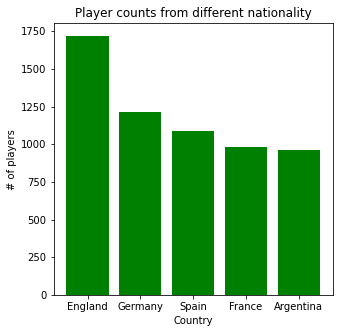

In [89]:
plt.figure(figsize=(5,5))
plt.bar(list(players['nationality_name'].value_counts()[0:5].keys()),list(players['nationality_name'].value_counts()[0:5]),color="g")
plt.xlabel("Country")
plt.ylabel("# of players")
plt.title("Player counts from different nationality")
plt.show()        

Question: Who are getting the Top Dollar [Actually Euros here]?

In [70]:
player_salary = players[['short_name','wage_eur']]
player_salary.head()

,short_name,wage_eur
0,L. Messi,320000.0
1,R. Lewandowski,270000.0
2,Cristiano Ronaldo,270000.0
3,Neymar Jr,270000.0
4,K. De Bruyne,350000.0


In [71]:
player_salary=player_salary.sort_values(by=['wage_eur'],ascending=False)
player_salary.head()

,short_name,wage_eur
4,K. De Bruyne,350000.0
11,K. Benzema,350000.0
0,L. Messi,320000.0
14,Casemiro,310000.0
24,T. Kroos,310000.0


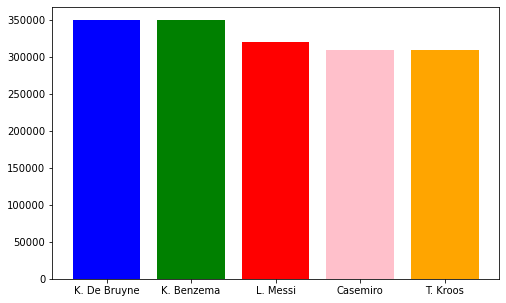

In [72]:
plt.figure(figsize=(8,5))
plt.bar(list(player_salary['short_name'])[0:5],list(player_salary['wage_eur'])[0:5],color=["blue","green","red","pink","orange"])
plt.show()

Let's see what we are having with the largest number of players from the nationality England?
Question: What are the reason behind this many number of players from this origin?

In [73]:
England=players[players['nationality_name']=='England']
England.head(10)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,gender
9,202126,https://sofifa.com/player/202126/harry-kane/22...,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,...,61+3,61+3,64+3,20+3,https://cdn.sofifa.net/players/202/126/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,male
27,202652,https://sofifa.com/player/202652/raheem-sterli...,R. Sterling,Raheem Sterling,"LW, RW",88,89,107500000.0,290000.0,26,...,55+3,55+3,65+3,21+3,https://cdn.sofifa.net/players/202/652/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,male
44,231281,https://sofifa.com/player/231281/trent-alexand...,T. Alexander-Arnold,Trent Alexander-Arnold,RB,87,92,114000000.0,150000.0,22,...,78+3,78+3,83+3,19+3,https://cdn.sofifa.net/players/231/281/22_120.png,https://cdn.sofifa.net/teams/9/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,male
45,233049,https://sofifa.com/player/233049/jadon-sancho/...,J. Sancho,Jadon Sancho,"RM, CF, LM",87,91,116500000.0,150000.0,21,...,48+3,48+3,60+3,19+3,https://cdn.sofifa.net/players/233/049/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,male
60,208830,https://sofifa.com/player/208830/jamie-vardy/2...,J. Vardy,Jamie Vardy,ST,86,86,33000000.0,180000.0,34,...,63+3,63+3,67+3,22+3,https://cdn.sofifa.net/players/208/830/22_120.png,https://cdn.sofifa.net/teams/95/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png,male
80,188377,https://sofifa.com/player/188377/kyle-walker/2...,K. Walker,Kyle Walker,RB,85,85,39000000.0,170000.0,31,...,81+3,81+3,82+3,19+3,https://cdn.sofifa.net/players/188/377/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,male
94,231677,https://sofifa.com/player/231677/marcus-rashfo...,M. Rashford,Marcus Rashford,"LM, ST",85,89,77500000.0,150000.0,23,...,57+3,57+3,63+3,18+3,https://cdn.sofifa.net/players/231/677/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,male
102,183711,https://sofifa.com/player/183711/jordan-hender...,J. Henderson,Jordan Henderson,"CDM, CM",84,84,29500000.0,140000.0,31,...,79+3,79+3,79+3,19+3,https://cdn.sofifa.net/players/183/711/22_120.png,https://cdn.sofifa.net/teams/9/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,male
104,186345,https://sofifa.com/player/186345/kieran-trippi...,K. Trippier,Kieran Trippier,"RB, RWB, RM",84,84,36500000.0,74000.0,30,...,78+2,78+2,81+2,19+2,https://cdn.sofifa.net/players/186/345/22_120.png,https://cdn.sofifa.net/teams/240/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,male
114,203263,https://sofifa.com/player/203263/harry-maguire...,H. Maguire,Harry Maguire,CB,84,86,42500000.0,155000.0,28,...,84+2,84+2,76+3,21+3,https://cdn.sofifa.net/players/203/263/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,male


In [74]:
England.sort_values(by=['height_cm'],ascending=False).head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,gender
15216,215408,https://sofifa.com/player/215408/aaron-chapman...,A. Chapman,Aaron James Chapman,GK,60,60,130000.0,1000.0,31,...,24+2,24+2,22+2,59+1,https://cdn.sofifa.net/players/215/408/22_120.png,https://cdn.sofifa.net/teams/1802/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png,male
16673,251453,https://sofifa.com/player/251453/dan-langley/2...,D. Langley,Daniel Langley,GK,58,75,475000.0,3000.0,20,...,20+2,20+2,18+2,57+2,https://cdn.sofifa.net/players/251/453/22_120.png,https://cdn.sofifa.net/teams/13/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png,male
1490,172203,https://sofifa.com/player/172203/fraser-forste...,F. Forster,Fraser Forster,GK,75,75,1800000.0,34000.0,33,...,29+2,29+2,25+2,74+1,https://cdn.sofifa.net/players/172/203/22_120.png,https://cdn.sofifa.net/teams/17/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png,male
5675,204846,https://sofifa.com/player/204846/jamal-blackma...,J. Blackman,Jamal Blackman,GK,69,72,1400000.0,3000.0,27,...,25+2,25+2,21+2,68+2,https://cdn.sofifa.net/players/204/846/22_120.png,https://cdn.sofifa.net/teams/112996/60.png,https://cdn.sofifa.net/flags/us.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png,male
13658,232174,https://sofifa.com/player/232174/oliver-hawkin...,O. Hawkins,Oliver Jack Hawkins,ST,62,62,400000.0,4000.0,29,...,62,62,54+2,16+2,https://cdn.sofifa.net/players/232/174/22_120.png,https://cdn.sofifa.net/teams/1940/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png,male


In [54]:
England.sort_values(by=['weight_kg'],ascending=False).head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
9816,156321,https://sofifa.com/player/156321/adebayo-akinf...,A. Akinfenwa,Saheed Adebayo Akinfenwa,ST,65,65,240000.0,2000.0,39,...,50+2,50+2,50+2,41+2,17+2,https://cdn.sofifa.net/players/156/321/22_120.png,https://cdn.sofifa.net/teams/1933/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
7664,202123,https://sofifa.com/player/202123/chuks-aneke/2...,C. Aneke,Chukwuemeka Ademola Amachi Aneke,ST,67,67,1100000.0,9000.0,27,...,61+2,61+2,61+2,55+2,15+2,https://cdn.sofifa.net/players/202/123/22_120.png,https://cdn.sofifa.net/teams/88/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
114,203263,https://sofifa.com/player/203263/harry-maguire...,H. Maguire,Harry Maguire,CB,84,86,42500000.0,155000.0,28,...,84+2,84+2,84+2,76+3,21+3,https://cdn.sofifa.net/players/203/263/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png
4614,163600,https://sofifa.com/player/163600/john-ruddy/22...,J. Ruddy,John Ruddy,GK,70,70,275000.0,27000.0,34,...,26+2,26+2,26+2,25+2,69+1,https://cdn.sofifa.net/players/163/600/22_120.png,https://cdn.sofifa.net/teams/110/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
13466,202770,https://sofifa.com/player/202770/connor-ripley...,C. Ripley,Connor Ripley,GK,62,64,350000.0,5000.0,28,...,26+2,26+2,26+2,22+2,61+2,https://cdn.sofifa.net/players/202/770/22_120.png,https://cdn.sofifa.net/teams/1801/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png


In [28]:
England.sort_values(by=['wage_eur'],ascending=False).head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
24,182521,https://sofifa.com/player/182521/toni-kroos/22...,T. Kroos,Toni Kroos,CM,88,88,75000000.0,310000.0,31,...,71+3,71+3,71+3,74+3,19+3,https://cdn.sofifa.net/players/182/521/22_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/de.png
8,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,...,33+3,33+3,33+3,31+3,88+3,https://cdn.sofifa.net/players/192/448/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/de.png
78,186942,https://sofifa.com/player/186942/ilkay-gundoga...,İ. Gündoğan,İlkay Gündoğan,"CM, CDM",85,85,51500000.0,185000.0,30,...,73+3,73+3,73+3,75+3,19+3,https://cdn.sofifa.net/players/186/942/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
19,212622,https://sofifa.com/player/212622/joshua-kimmic...,J. Kimmich,Joshua Walter Kimmich,"CDM, RB",89,90,108000000.0,160000.0,26,...,81+3,81+3,81+3,83+3,21+3,https://cdn.sofifa.net/players/212/622/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
126,212188,https://sofifa.com/player/212188/timo-werner/2...,T. Werner,Timo Werner,"ST, LW",84,87,56500000.0,155000.0,25,...,50+3,50+3,50+3,58+3,19+3,https://cdn.sofifa.net/players/212/188/22_120.png,https://cdn.sofifa.net/teams/5/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png


In [55]:
England[['short_name','wage_eur']].sort_values(by=['wage_eur'],ascending=False).head()

,short_name,wage_eur
27,R. Sterling,290000.0
9,H. Kane,240000.0
60,J. Vardy,180000.0
118,J. Grealish,180000.0
80,K. Walker,170000.0


Let's see if about the attack and defence of the team.

In [80]:
# Shooting
player_shooting= players[['short_name','shooting','nationality_name','club_name']]
player_shooting.sort_values(by=['shooting'],ascending=False).head()

,short_name,shooting,nationality_name,club_name
2,Cristiano Ronaldo,94.0,Portugal,Manchester United
0,L. Messi,92.0,Argentina,Paris Saint-Germain
1,R. Lewandowski,92.0,Poland,FC Bayern München
29,E. Haaland,91.0,Norway,Borussia Dortmund
9,H. Kane,91.0,England,Tottenham Hotspur


In [81]:
#defending
player_defending= players[['short_name','defending','nationality_name','club_name']]
player_defending.sort_values(by=['defending'],ascending=False).head()

,short_name,defending,nationality_name,club_name
15,V. van Dijk,91.0,Netherlands,Liverpool
49,M. Hummels,89.0,Germany,Borussia Dortmund
47,G. Chiellini,89.0,Italy,Juventus
39,Marquinhos,89.0,Brazil,Paris Saint-Germain
46,Rúben Dias,88.0,Portugal,Manchester City


In [85]:
manchester=players[players['club_name']=='Manchester City']
manchester.sort_values(by=['wage_eur'],ascending=False).head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,gender
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png,male
27,202652,https://sofifa.com/player/202652/raheem-sterli...,R. Sterling,Raheem Sterling,"LW, RW",88,89,107500000.0,290000.0,26,...,55+3,55+3,65+3,21+3,https://cdn.sofifa.net/players/202/652/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,male
58,204485,https://sofifa.com/player/204485/riyad-mahrez/...,R. Mahrez,Riyad Mahrez,"RW, RM",86,86,65500000.0,220000.0,30,...,48+3,48+3,58+3,18+3,https://cdn.sofifa.net/players/204/485/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/dz.png,male
65,218667,https://sofifa.com/player/218667/bernardo-mota...,Bernardo Silva,Bernardo Mota Veiga de Carvalho e Silva,"CAM, CM, RW",86,87,80000000.0,200000.0,26,...,60+2,60+2,69+2,18+2,https://cdn.sofifa.net/players/218/667/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,male
18,210257,https://sofifa.com/player/210257/ederson-santa...,Ederson,Ederson Santana de Moraes,GK,89,91,94000000.0,200000.0,27,...,35+3,35+3,36+3,87+3,https://cdn.sofifa.net/players/210/257/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/br.png,male


In [86]:
manchester.sort_values(by=['shooting'],ascending=False).head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,gender
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png,male
27,202652,https://sofifa.com/player/202652/raheem-sterli...,R. Sterling,Raheem Sterling,"LW, RW",88,89,107500000.0,290000.0,26,...,55+3,55+3,65+3,21+3,https://cdn.sofifa.net/players/202/652/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,male
191,230666,https://sofifa.com/player/230666/gabriel-ferna...,Gabriel Jesus,Gabriel Fernando de Jesus,ST,83,87,52500000.0,150000.0,24,...,54+2,54+2,58+2,19+2,https://cdn.sofifa.net/players/230/666/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/br.png,male
78,186942,https://sofifa.com/player/186942/ilkay-gundoga...,İ. Gündoğan,İlkay Gündoğan,"CM, CDM",85,85,51500000.0,185000.0,30,...,73+3,73+3,75+3,19+3,https://cdn.sofifa.net/players/186/942/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png,male
58,204485,https://sofifa.com/player/204485/riyad-mahrez/...,R. Mahrez,Riyad Mahrez,"RW, RM",86,86,65500000.0,220000.0,30,...,48+3,48+3,58+3,18+3,https://cdn.sofifa.net/players/204/485/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/dz.png,male


In [88]:
manchester.sort_values(by=['defending'],ascending=False).head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,gender
46,239818,https://sofifa.com/player/239818/ruben-santos-...,Rúben Dias,Rúben dos Santos Gato Alves Dias,CB,87,91,102500000.0,170000.0,24,...,86+3,86+3,80+3,17+3,https://cdn.sofifa.net/players/239/818/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,male
63,212218,https://sofifa.com/player/212218/aymeric-lapor...,A. Laporte,Aymeric Laporte,CB,86,89,77000000.0,185000.0,27,...,85+3,85+3,79+3,18+3,https://cdn.sofifa.net/players/212/218/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1362/60.png,https://cdn.sofifa.net/flags/es.png,male
140,135507,https://sofifa.com/player/135507/fernando-luiz...,Fernandinho,Fernando Luiz Rosa,"CDM, CB",83,83,7000000.0,100000.0,36,...,82+1,82+1,77+3,19+3,https://cdn.sofifa.net/players/135/507/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/br.png,male
166,203574,https://sofifa.com/player/203574/john-stones/2...,J. Stones,John Stones,CB,83,86,41000000.0,140000.0,27,...,83+2,83+2,79+2,18+2,https://cdn.sofifa.net/players/203/574/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png,male
67,231866,https://sofifa.com/player/231866/rodrigo-herna...,Rodri,Rodrigo Hernández Cascante,CDM,86,89,81000000.0,175000.0,25,...,81+3,81+3,78+3,18+3,https://cdn.sofifa.net/players/231/866/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1362/60.png,https://cdn.sofifa.net/flags/es.png,male


In [87]:
manchester['nationality_name'].value_counts()

England          12
Brazil            4
Spain             4
Portugal          3
Netherlands       2
Belgium           2
United States     1
France            1
Germany           1
Ukraine           1
Algeria           1
Name: nationality_name, dtype: int64

In [126]:
# Gender and Nationality analysis

players['gender'].value_counts()

male      19239
female      391
Name: gender, dtype: int64

In [125]:
columns=['nationality_name','gender','wage_eur','age']

players[columns].groupby(['gender','nationality_name'])['age','wage_eur'].agg(avg_age=('age','mean'),avg_wage=('wage_eur','mean')).sort_values(by=['gender','nationality_name'],ascending=False)


<ipython-input-125-a883b4e05440>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  players[columns].groupby(['gender','nationality_name'])['age','wage_eur'].agg(avg_age=('age','mean'),avg_wage=('wage_eur','mean')).sort_values(by=['gender','nationality_name'],ascending=False)


avg_age      avg_wage
gender nationality_name                         
male   Zimbabwe          25.615385  12307.692308
       Zambia            25.555556  19388.888889
       Wales             24.094891   9582.481752
       Vietnam           27.000000   2000.000000
       Venezuela         24.816038   2861.084906
...                            ...           ...
female China PR          28.217391           NaN
       Canada            27.869565           NaN
       Brazil            30.913043           NaN
       Belgium           25.608696    932.608696
       Australia         25.565217           NaN

[180 rows x 2 columns]